In [53]:
#importing the essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
#install ucimlrepo for importing the dataset
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

In [2]:
#removed any warnings
import warnings
warnings.filterwarnings('ignore')

EXPLORATORY DATA ANALYSIS

In [3]:
# retrieve the dataset
dt_chronic_kidney = fetch_ucirepo(id=336)

# Pandas dataframes for the data : data and target class
X_kidney = dt_chronic_kidney.data.features
y_kidney = dt_chronic_kidney.data.targets

# Printing the data details
print(dt_chronic_kidney.metadata)

# printing the information regarding the variable
print(dt_chronic_kidney.variables)

#print X_kidney
print(X_kidney)

#print the target variables
print(y_kidney)

{'uci_id': 336, 'name': 'Chronic Kidney Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/336/data.csv', 'abstract': 'This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 400, 'num_features': 24, 'feature_types': ['Real'], 'demographics': ['Age'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2015, 'last_updated': 'Mon Mar 04 2024', 'dataset_doi': '10.24432/C5G020', 'creators': ['L. Rubini', 'P. Soundarapandian', 'P. Eswaran'], 'intro_paper': None, 'additional_info': {'summary': 'We use the following representation to collect the dataset\r\n                        age\t\t-\tage\t\r\n\t\t\tbp\t\t-\tblood pressure\r\n\t\t\tsg\t

In [4]:
#shape of the data
X_kidney.shape

(400, 24)

In [5]:
# columns of the data
X_kidney.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

In [6]:
#dtype of the data
X_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [7]:
#check the info the class
y_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   400 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [8]:
#print the data's summary statistics.
X_kidney.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [9]:
#Verifying  and identifying any missing values in the data
X_miss_kid = X_kidney.isnull().sum()
print(X_miss_kid)

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
dtype: int64


In [10]:
#Similarly identifying any missing values in target
Y_miss_kid = y_kidney.isnull().sum()
print(Y_miss_kid)

class    0
dtype: int64


In [11]:
# Identify for duplicates
X_kidney.duplicated().sum()

0

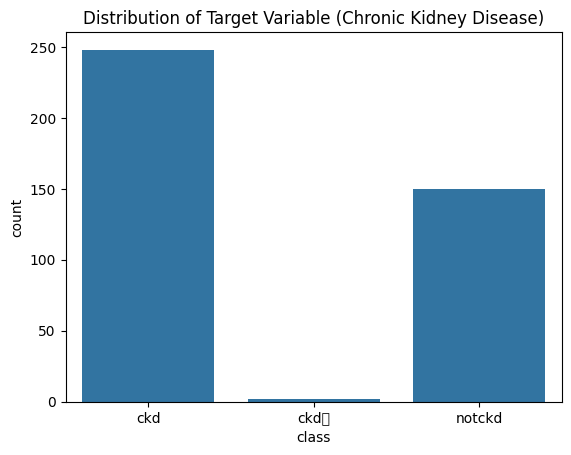

In [12]:
# Visualize the target variable's distribution.
sns.countplot(x=y_kidney['class'])
plt.title("Distribution of Target Variable (Chronic Kidney Disease)")
plt.show()


In [13]:
# Data cleaning: Find unique values in the target variable
print(y_kidney['class'].unique())

['ckd' 'ckd\t' 'notckd']


In [14]:
# Replace 'ckd\t' with 'ckd'
y_kidney['class'] = y_kidney['class'].replace('ckd\t', 'ckd')

# Verify the replacement
print(y_kidney['class'].unique())

['ckd' 'notckd']


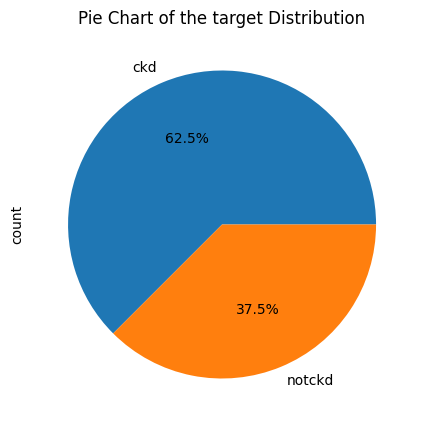

In [15]:
# After the target variable has been cleaned, plot a pie chart.
plot_df = y_kidney['class'].value_counts()
plot_df.plot(kind="pie", autopct='%1.1f%%', figsize=(5, 5), title='Pie Chart of the target Distribution')
plt.show()

In [16]:
# Separate numerical and categorical features
num_kid_feat = X_kidney.select_dtypes(include=['int64', 'float64']).columns.tolist()
cag_kid_feat = X_kidney.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numerical Features:", num_kid_feat)
print("Categorical Features:", cag_kid_feat)

Numerical Features: ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
Categorical Features: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [17]:
# Find lengths of numerical and categorical features
num_length = len(num_kid_feat)
cag_length = len(cag_kid_feat)

print("Number of Numerical Features:", num_length)
print("Number of Categorical Features:", cag_length)


Number of Numerical Features: 14
Number of Categorical Features: 10


In [18]:
# Descriptive statistics for numerical features
numl_description = X_kidney[num_kid_feat].describe()
print("Descriptive Statistics for Numerical Features:")
print(numl_description)

# Descriptive statistics for categorical features
cag_description = {}
for feature in cag_kid_feat:
    cag_description[feature] = X_kidney[feature].value_counts()

print("\nDescriptive Statistics for Categorical Features:")
for feature, counts in cag_description.items():
    print(f"\n{feature}:")
    print(counts)


Descriptive Statistics for Numerical Features:
              age          bp          sg          al          su         bgr  \
count  391.000000  388.000000  353.000000  354.000000  351.000000  356.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     17.169714   13.683637    0.005717    1.352679    1.099191   79.281714   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.010000    0.000000    0.000000   99.000000   
50%     55.000000   80.000000    1.020000    0.000000    0.000000  121.000000   
75%     64.500000   80.000000    1.020000    2.000000    0.000000  163.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  381.000000  383.000000  313.000000  312.000000  348.000000  329.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.52

<Figure size 1500x1000 with 0 Axes>

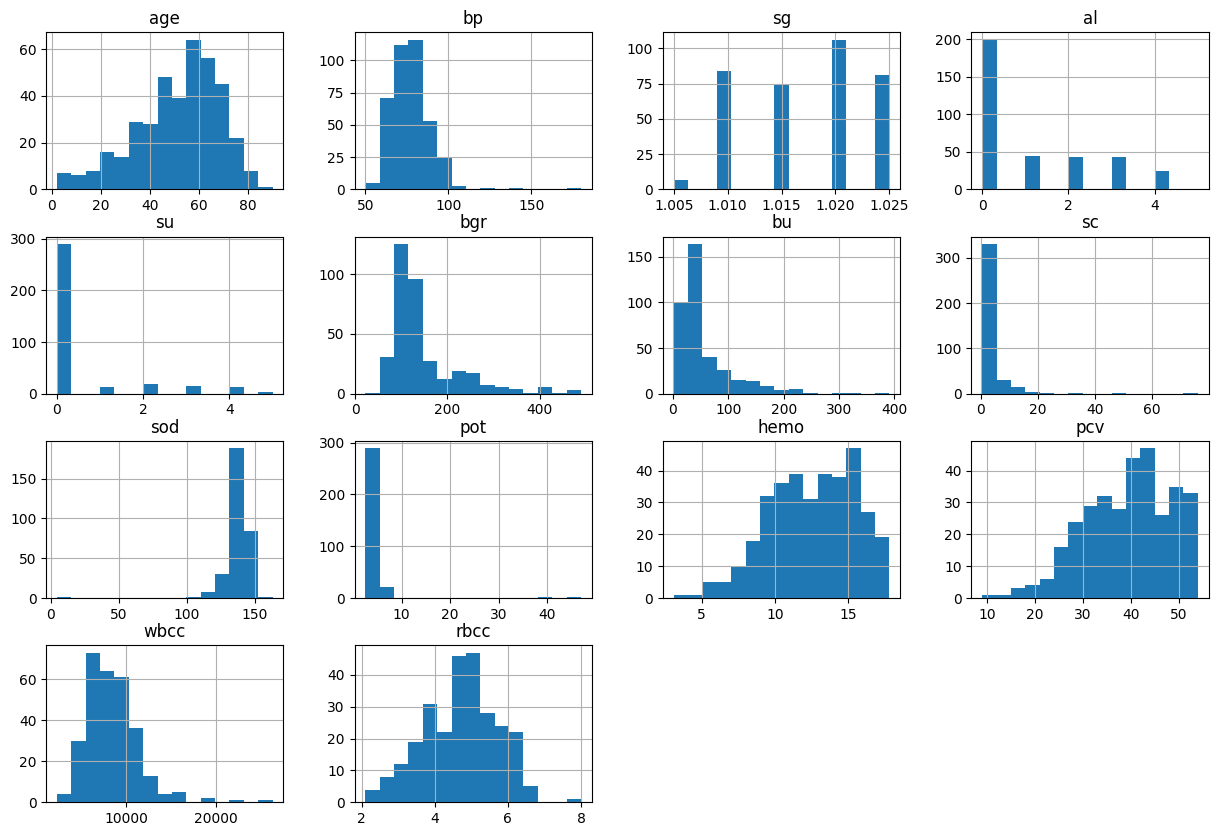

In [19]:
#plot the numerical features' histogram
plt.figure(figsize=(15, 10))
X_kidney[num_kid_feat].hist(bins=15, layout=(4, 4), figsize=(15, 10))
plt.title("Histograms of Numerical Features", fontsize=16)
plt.show()

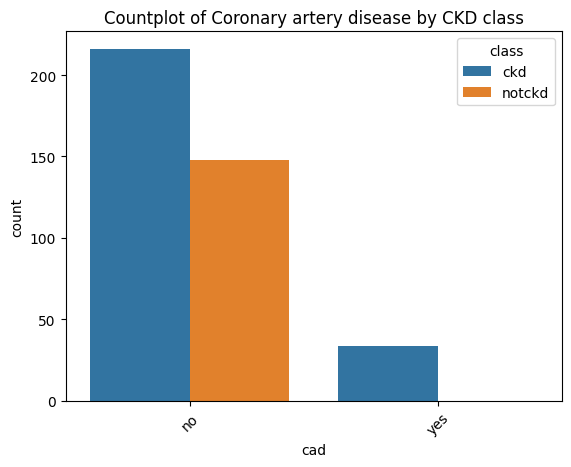

In [20]:
#Example of the countplot
plt.figure()
sns.countplot(x = X_kidney['cad'], hue = y_kidney['class'])
plt.title("Countplot of Coronary artery disease by CKD class")
plt.xticks(rotation=45)
plt.show()

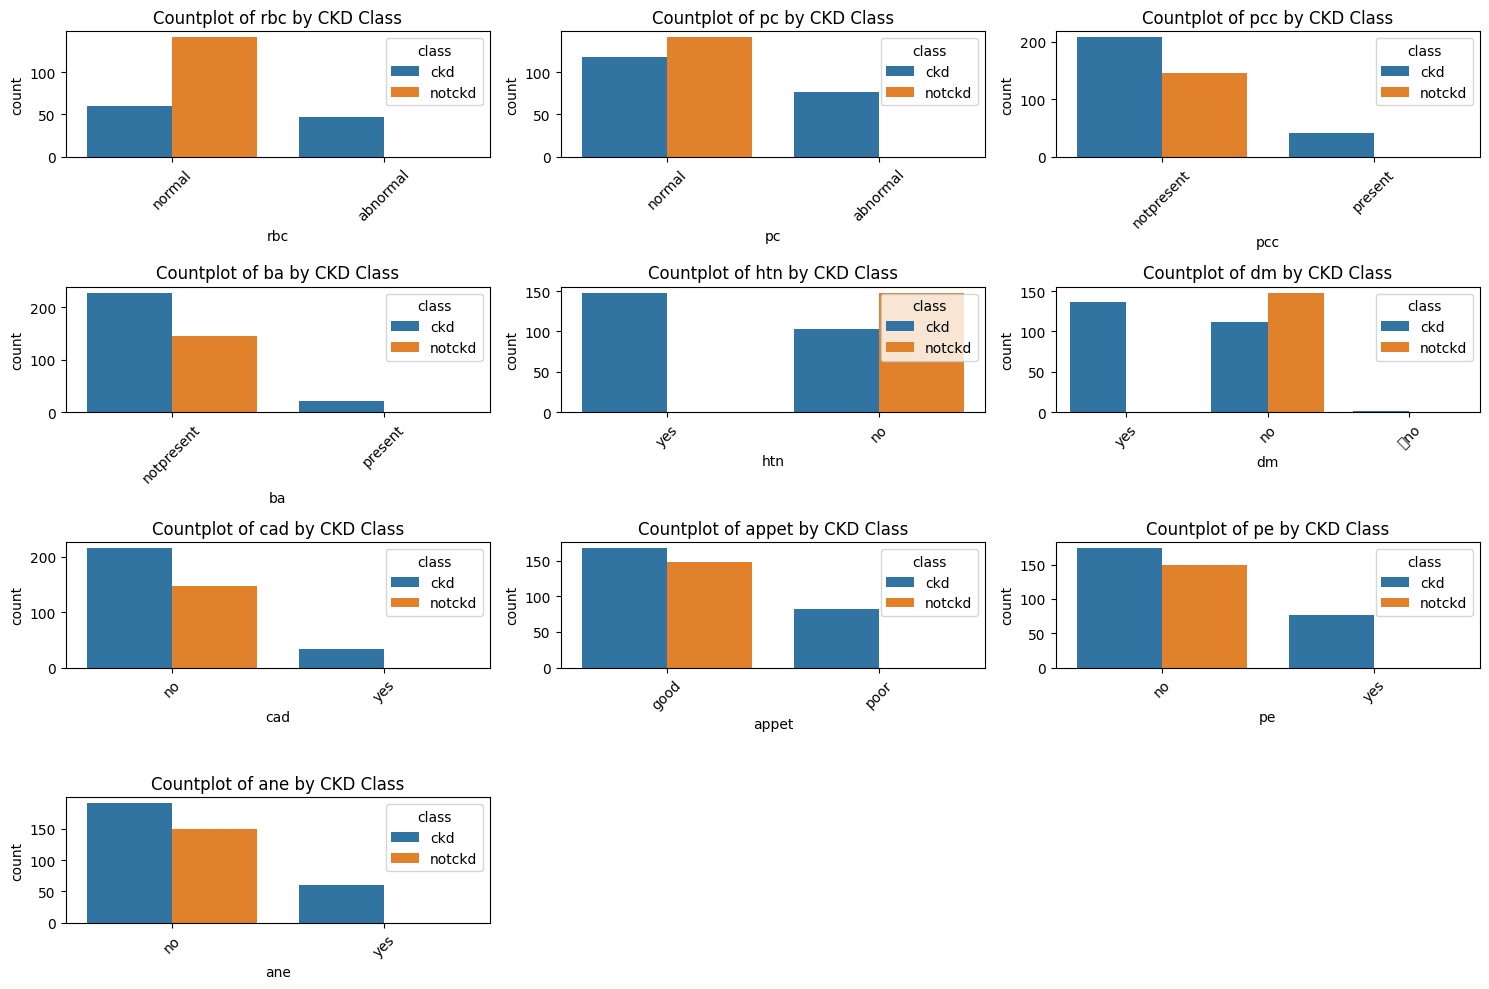

In [21]:
# Plot count plots for categorical features
plt.figure(figsize=(15, 10))
for i, f in enumerate(cag_kid_feat): # f is feature names
    plt.subplot(4, 3, i + 1) #4 rows , 3 columns
    sns.countplot(x=X_kidney[f], hue=y_kidney['class'])
    plt.title(f"Countplot of {f} by CKD Class")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# Identify the unique values in the 'dm' column (diabetics)
dm_valu = X_kidney['dm'].unique()
print("Unique values in 'dm' column:", dm_valu)


Unique values in 'dm' column: ['yes' 'no' '\tno' nan]


In [23]:
# Replace '\tno' with 'no' in the 'dm' column
X_kidney['dm'] = X_kidney['dm'].replace('\tno', 'no')
print(X_kidney['dm'].unique())

['yes' 'no' nan]


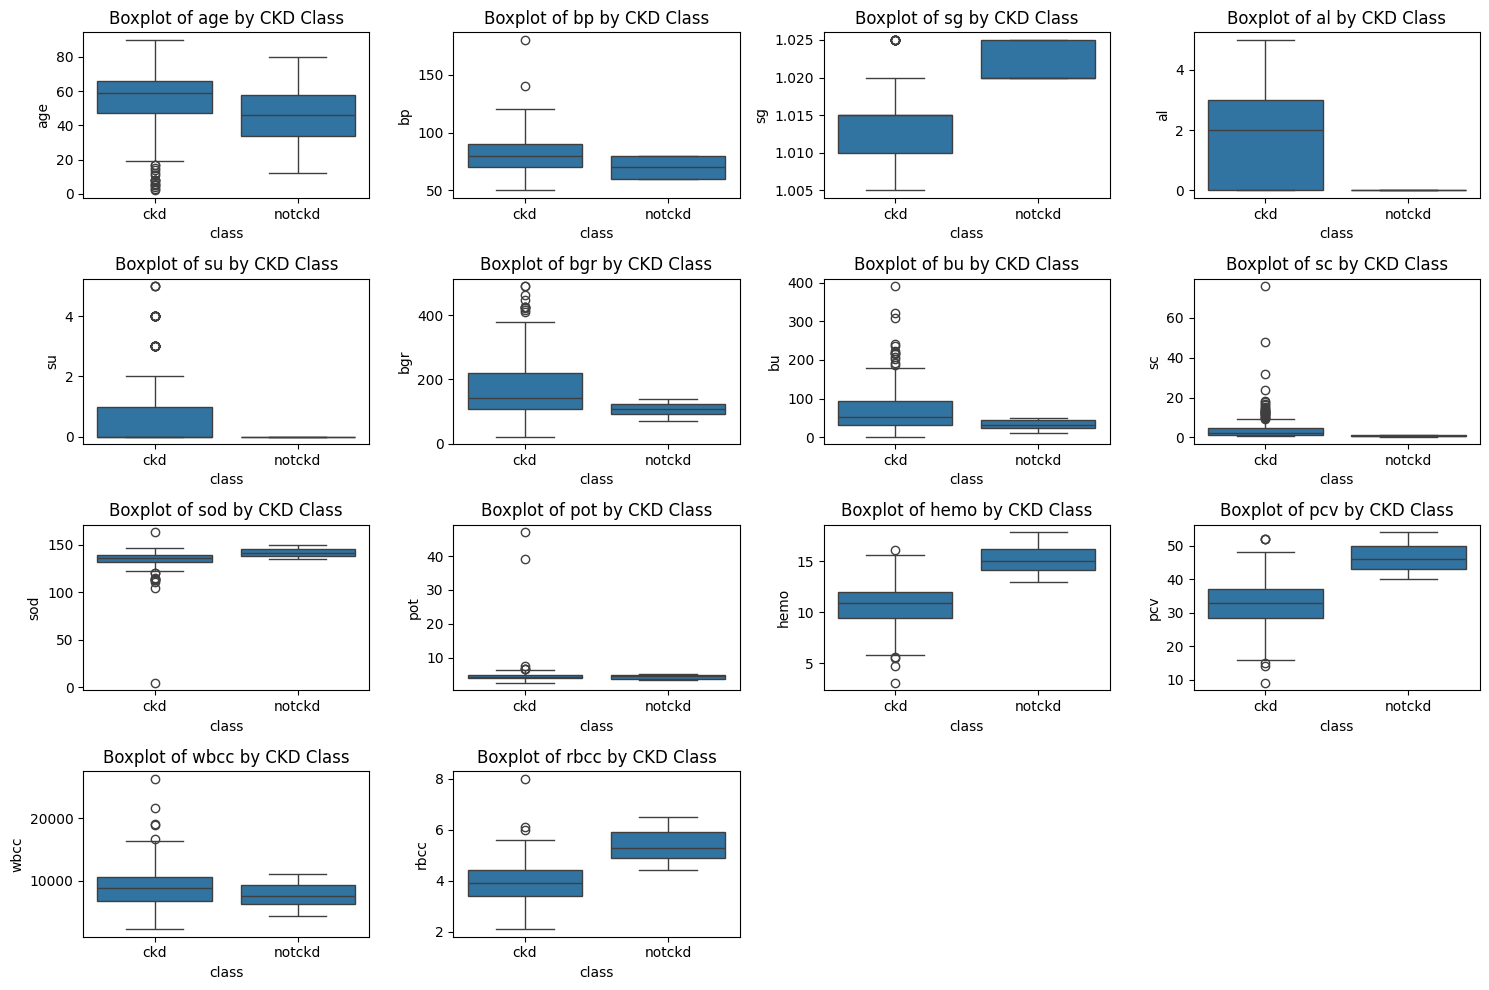

In [26]:
#box plot of the numerical feature
plt.figure(figsize=(15, 10))
for i, f in enumerate(num_kid_feat):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=y_kidney['class'], y=X_kidney[f])
    plt.title(f"Boxplot of {f} by CKD Class")
plt.tight_layout()
plt.show()

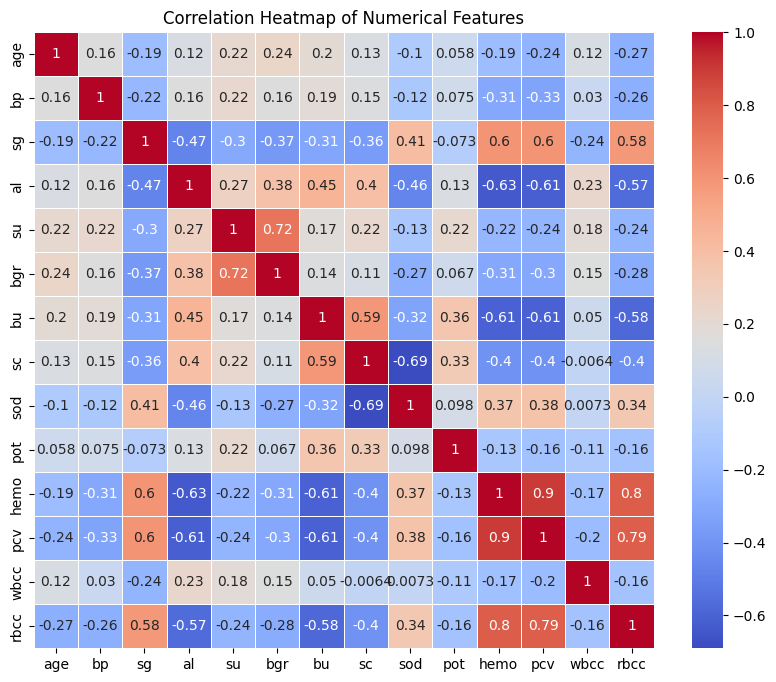

In [166]:
# Finding the correlation matrix
corr_ckd_matx = X_kidney[num_kid_feat].corr()
# Plot heatmap of the numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(corr_ckd_matx, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

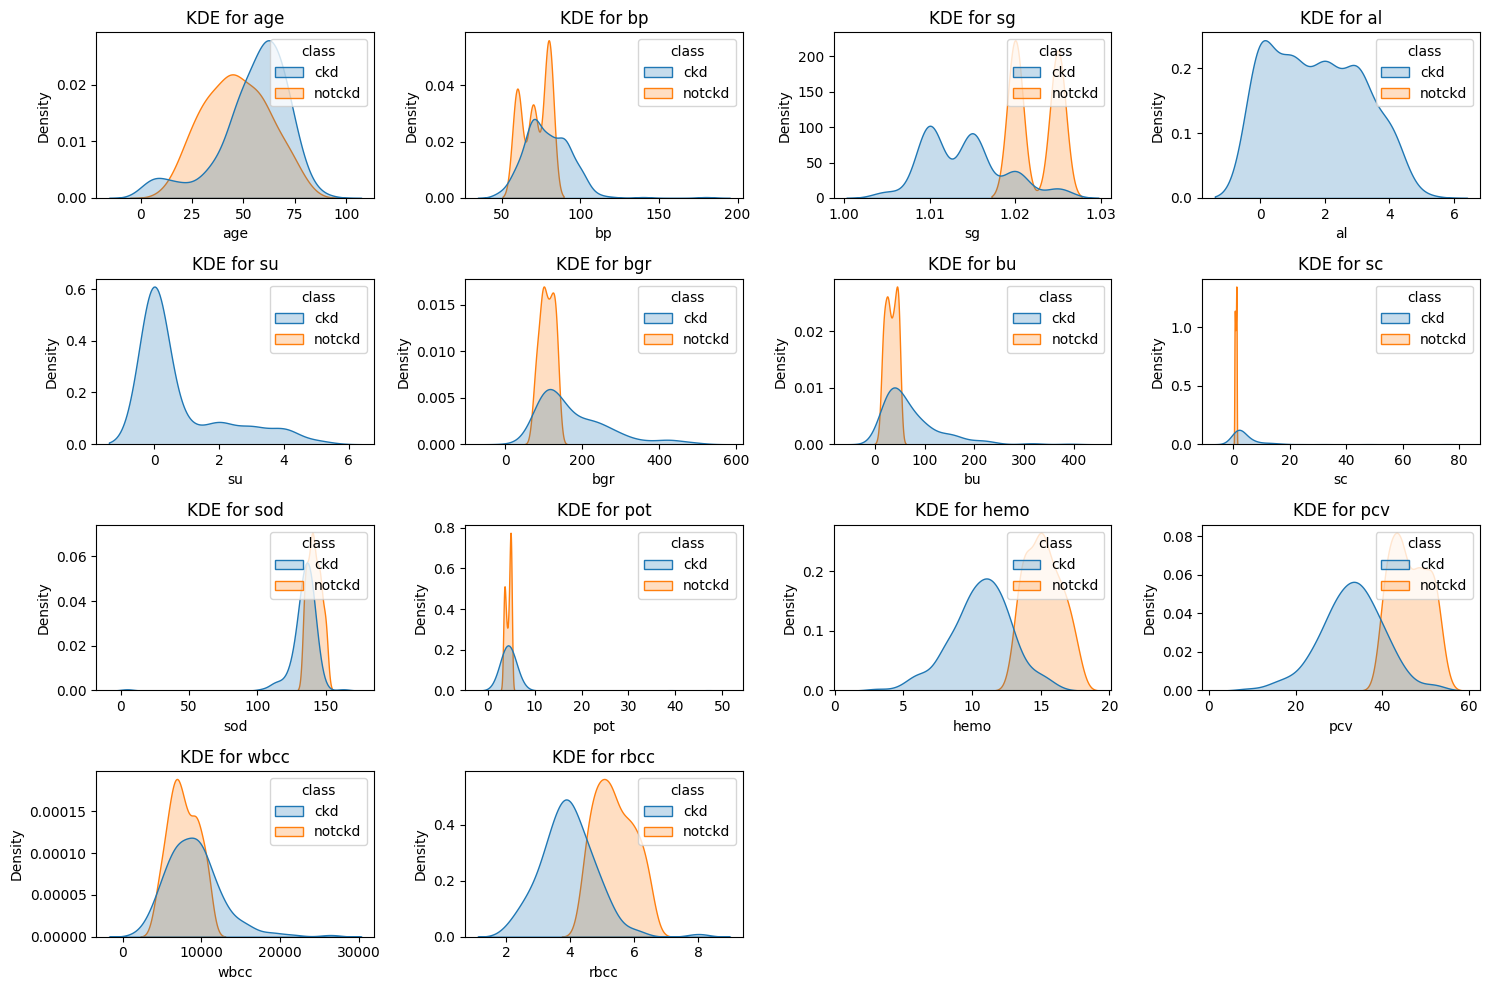

In [27]:
# KDE plots for all numerical features
plt.figure(figsize=(15, 10))
for i, f in enumerate(num_kid_feat):
    plt.subplot(4, 4, i + 1)
    sns.kdeplot(data=X_kidney, x=f, hue=y_kidney['class'], fill=True, common_norm=False)
    plt.title(f"KDE for {f}")
    plt.xlabel(f)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


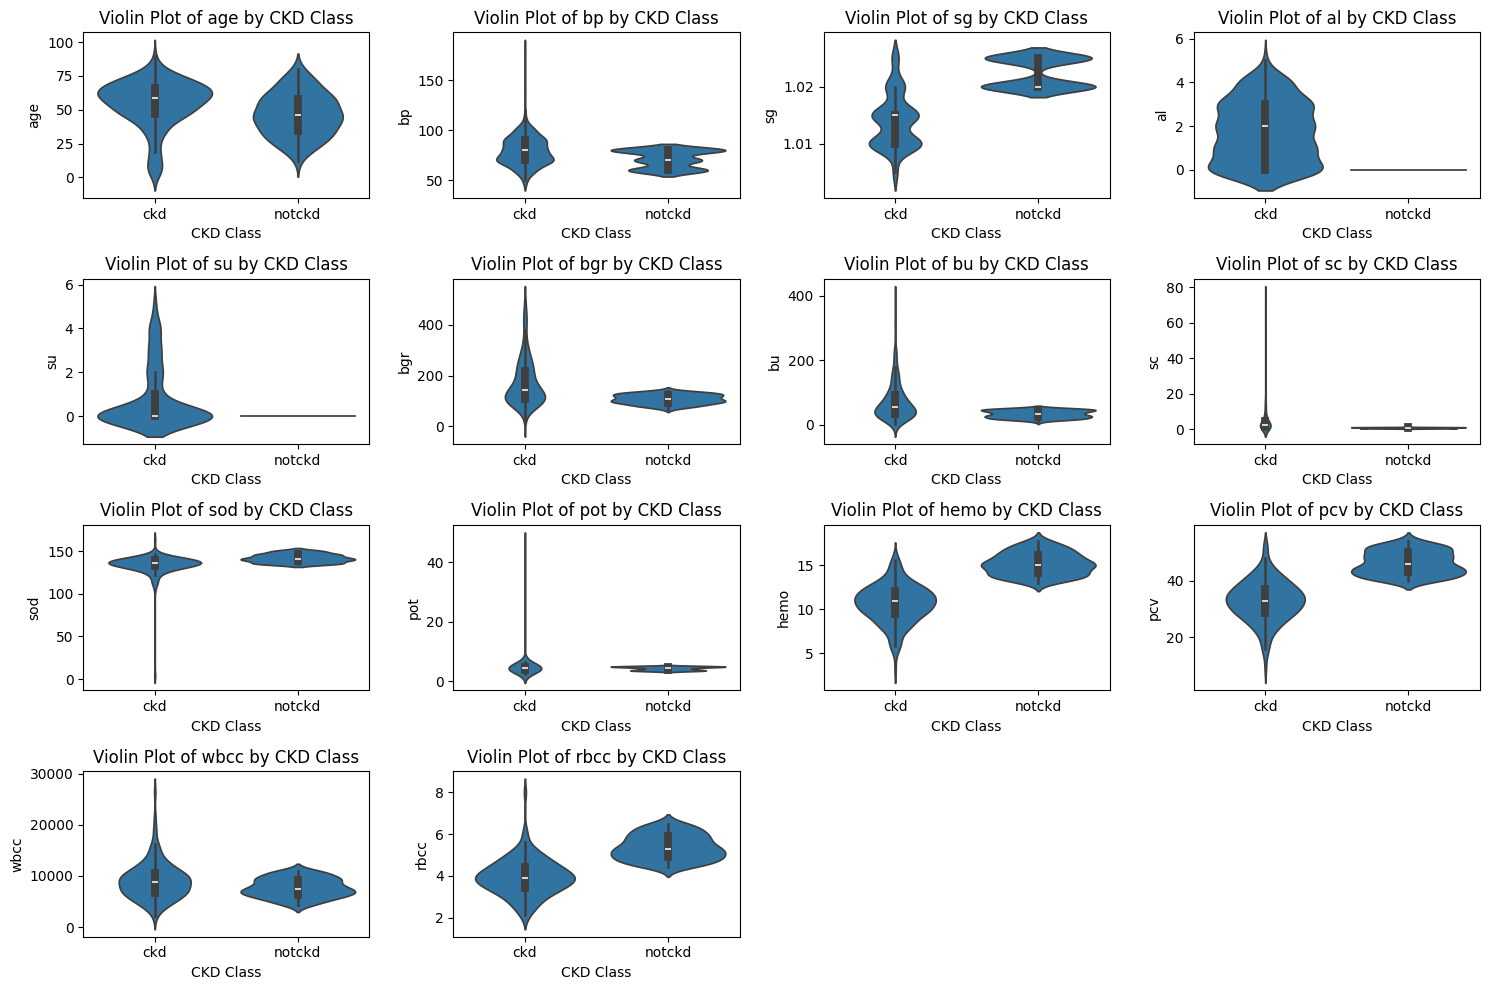

In [28]:
#violin plots for each numerical feature against the target variable
plt.figure(figsize=(15, 10))
for i, f in enumerate(num_kid_feat):
    plt.subplot(4, 4, i + 1)
    sns.violinplot(x=y_kidney['class'], y=X_kidney[f])
    plt.title(f"Violin Plot of {f} by CKD Class")
    plt.xlabel("CKD Class")
    plt.ylabel(f)

plt.tight_layout()
plt.show()


Data Preprocessing

In [30]:
# Set up the scaler.
scaler = StandardScaler()
# Scale only the numerical features
X_kidney[num_kid_feat] = scaler.fit_transform(X_kidney[num_kid_feat])
# Check the scaling
print(X_kidney[num_kid_feat].describe())

                age            bp            sg          al          su  \
count  3.910000e+02  3.880000e+02  3.530000e+02  354.000000  351.000000   
mean   9.994847e-17 -2.380684e-16  2.415443e-15    0.000000    0.000000   
std    1.001281e+00  1.001291e+00  1.001419e+00    1.001415    1.001428   
min   -2.885708e+00 -1.936857e+00 -2.173584e+00   -0.752868   -0.410106   
25%   -5.530393e-01 -4.733701e-01 -1.297699e+00   -0.752868   -0.410106   
50%    2.050779e-01  2.583733e-01  4.540705e-01   -0.752868   -0.410106   
75%    7.590867e-01  2.583733e-01  4.540705e-01    0.727772   -0.410106   
max    2.246163e+00  7.575807e+00  1.329955e+00    2.948733    4.145186   

                bgr            bu          sc           sod           pot  \
count  3.560000e+02  3.810000e+02  383.000000  3.130000e+02  3.120000e+02   
mean  -1.796316e-16 -3.729883e-17    0.000000  2.270105e-17 -7.970832e-17   
std    1.001407e+00  1.001315e+00    1.001308  1.001601e+00  1.001606e+00   
min   -1.591967e

In [31]:
#Setting up the label encoder
encoder = LabelEncoder()
#Processing the label encoding of categorical feature
for colm in cag_kid_feat:
    X_kidney[colm] = encoder.fit_transform(X_kidney[colm])

In [33]:
#Drop the feature that is substantially connected.
X_kidney.drop(['pcv', 'sg', 'sc', 'su'], axis=1, inplace=True)

In [34]:
#Changing the numerical and categorical characteristics' missing values
for f in X_kidney.columns: #Here f is the feature
    if f in num_kid_feat:
        X_kidney[f].fillna(X_kidney[f].mean(), inplace=True)
    elif f in cag_kid_feat:
        X_kidney[f].fillna(X_kidney[f].mode()[0], inplace=True)

In [35]:
#Mapping the target class values
y_kidney['class'] = y_kidney['class'].map({'ckd': 1, 'notckd': 0})
#Verifying the mapping
print(y_kidney['class'].value_counts())

class
1    250
0    150
Name: count, dtype: int64


In [38]:
#Seperating the data for training
features_train, features_test, labels_train, labels_test = train_test_split(X_kidney, y_kidney, test_size=0.2, random_state=42)

In [41]:
#Initialise the SMOTE for class imbalancing
smte=SMOTE(sampling_strategy='minority')
X_kidney, y_kidney=smte.fit_resample(X_kidney, y_kidney)
#Check shape after SMOTE
print(X_kidney.shape)

(500, 20)


In [57]:
# Setting up the Random Forest classifier
rndm_ckd = RandomForestClassifier(n_estimators=50, max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Fit the model
rndm_ckd .fit(features_train, labels_train)

# Predict on the test data
y_ckd_rndm = rndm_ckd .predict(features_test)

# Calculate accuracy
rndm_ckd_acc = accuracy_score(labels_test, y_ckd_rndm)

# Print classification report
print(classification_report(labels_test, y_ckd_rndm))

#Print the accuracy
print("accuracy test",rndm_ckd_acc)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

accuracy test 0.9875


Confusion Matrix:
 [[28  1]
 [ 0 51]]


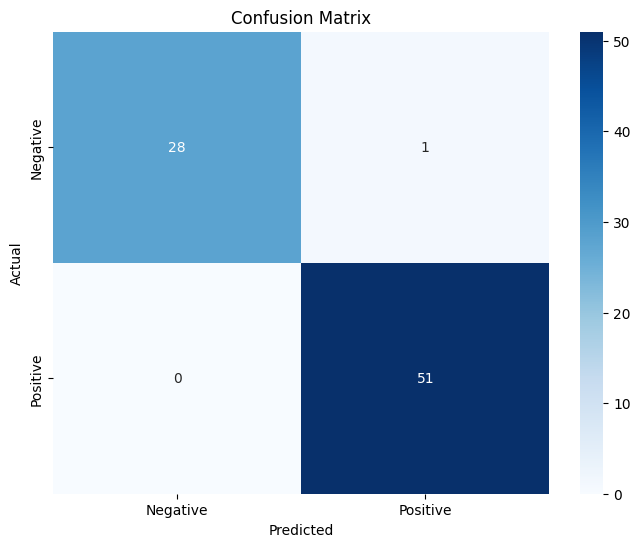

In [50]:
#Printing and plotting the confusion matrix for random forest
cm_rndm = confusion_matrix(y_ckd_rndm, labels_test)
print("Confusion Matrix:\n", cm_rndm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rndm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [51]:
importances = rndm_ckd.feature_importances_
feature_names = features_train.columns

# DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance_df)

   Feature  Importance
11    hemo    0.338255
13    rbcc    0.129776
7      bgr    0.105202
2       al    0.097417
3      rbc    0.075327
15      dm    0.060807
8       bu    0.038182
9      sod    0.037360
14     htn    0.034953
0      age    0.016988
12    wbcc    0.013448
1       bp    0.011394
17   appet    0.010639
4       pc    0.009303
18      pe    0.005669
19     ane    0.004616
10     pot    0.004465
6       ba    0.004173
5      pcc    0.001054
16     cad    0.000970


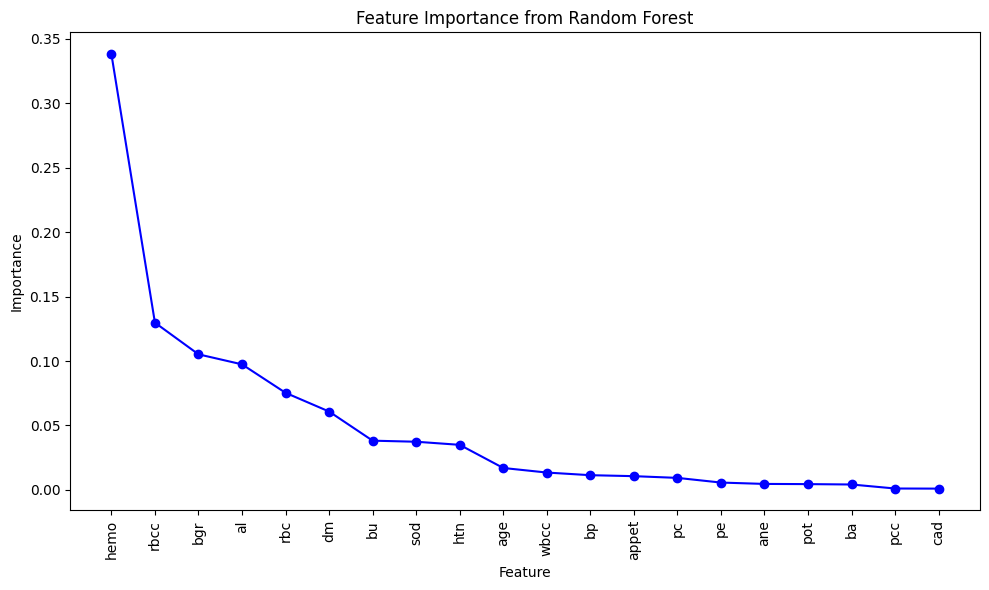

In [52]:
#plot for feature importance in random forest
plt.figure(figsize=(10, 6))
plt.plot(feature_importance_df['Feature'], feature_importance_df['Importance'], marker='o', linestyle='-', color='b')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [60]:
#Initialize the Support vector
svm_ckd_mdl = SVC(kernel='poly', random_state=42,tol=1e-4, gamma = 0.01, probability = True, max_iter = 5000)

# Train the SVM model on the SMOTE-resampled training data
svm_ckd_mdl.fit(features_train,labels_train)

# Predict on the test data
y_ckd_svm = svm_ckd_mdl.predict( features_test)

# Evaluate the model
sv_acc = accuracy_score(labels_test, y_ckd_svm)
print("Accuracy:", sv_acc)
print(classification_report(labels_test, y_ckd_svm))

Accuracy: 0.65
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.65      1.00      0.79        52

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_ckd_svm)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[26  2]
 [ 1 51]]


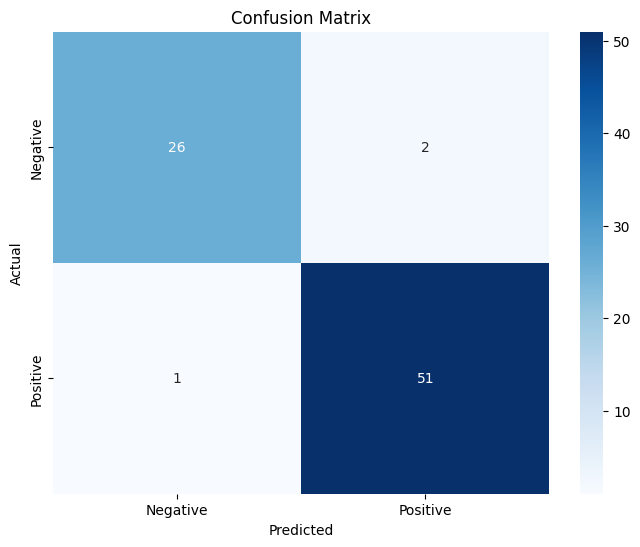

In [184]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [185]:
from sklearn.inspection import permutation_importance
perm_sv_ckd = permutation_importance(svm_ckd_mdl, X_test, y_test, scoring='accuracy')
print(perm_sv_ckd)

{'importances_mean': array([ 0.    ,  0.005 ,  0.0775,  0.0275,  0.    ,  0.    ,  0.    ,
        0.0275,  0.    , -0.0025,  0.    ,  0.1325,  0.0025,  0.    ,
        0.0075,  0.    , -0.0125, -0.0125, -0.0125]), 'importances_std': array([0.        , 0.00612372, 0.02150581, 0.01837117, 0.        ,
       0.        , 0.        , 0.01658312, 0.        , 0.005     ,
       0.        , 0.02806243, 0.005     , 0.        , 0.00612372,
       0.        , 0.        , 0.        , 0.        ]), 'importances': array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.0125,  0.    ,  0.    ,  0.0125,  0.    ],
       [ 0.075 ,  0.0875,  0.1125,  0.0625,  0.05  ],
       [ 0.0375,  0.0375,  0.05  ,  0.0125,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.0375,  0.025 ,  0.025 ,  0.05  ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       

In [186]:
for i in perm_sv_ckd.importances_mean.argsort()[::-1]:
    print(f"{X_kidney.columns[i]}: {perm_sv_ckd.importances_mean[i]:.4f}")

hemo: 0.1325
al: 0.0775
rbc: 0.0275
bgr: 0.0275
dm: 0.0075
bp: 0.0050
wbcc: 0.0025
age: 0.0000
cad: 0.0000
htn: 0.0000
pot: 0.0000
bu: 0.0000
ba: 0.0000
pcc: 0.0000
pc: 0.0000
sod: -0.0025
pe: -0.0125
appet: -0.0125
ane: -0.0125


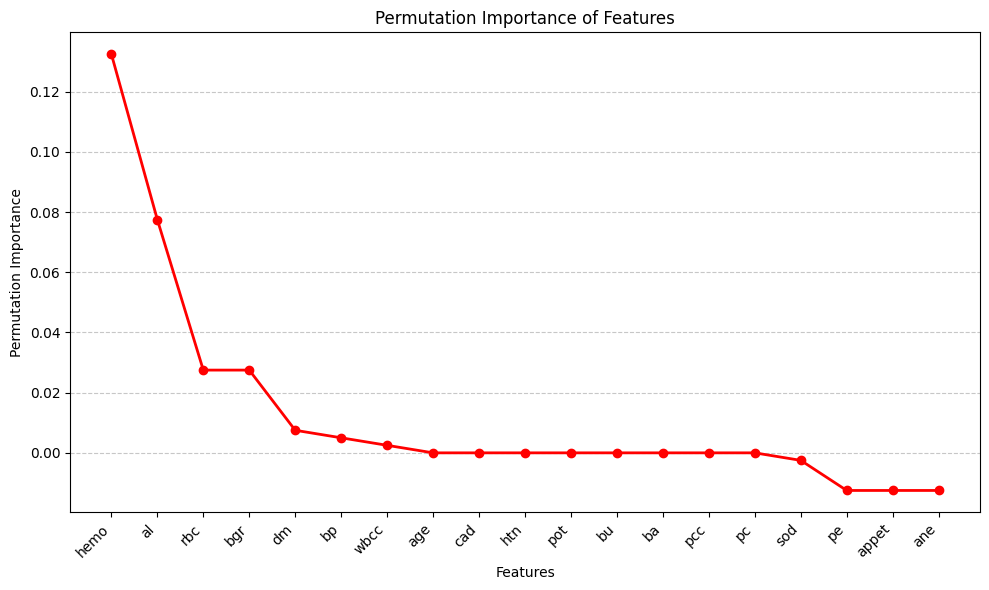

In [187]:
importances = perm_sv_ckd.importances_mean
features = X_kidney.columns
sorted_indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.plot(importances[sorted_indices], marker='o', linestyle='-', color='red', linewidth=2)
plt.xticks(ticks=range(len(sorted_indices)), labels=features[sorted_indices], rotation=45, ha='right')
plt.ylabel('Permutation Importance')
plt.xlabel('Features')
plt.title('Permutation Importance of Features')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [188]:
# import XGBoost
import xgboost as xgb
# import XGBClassifier
from xgboost import XGBClassifier
# Create an XGBoost classifier
modelxgb = xgb.XGBClassifier(random_state=45, use_label_encoder=True,
                             eval_metric='logloss', max_depth = 6, learning_rate = 0.1, n_estimators=100, subsample = 0.8)
# Train the model on the training data
modelxgb.fit(X_train, y_train)
# Make predictions on the validation data
y_ckd_xgb = modelxgb.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_ckd_xgb)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_ckd_xgb))

Accuracy: 0.975
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.98      0.98      0.98        52

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [189]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_ckd_xgb)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[27  1]
 [ 1 51]]


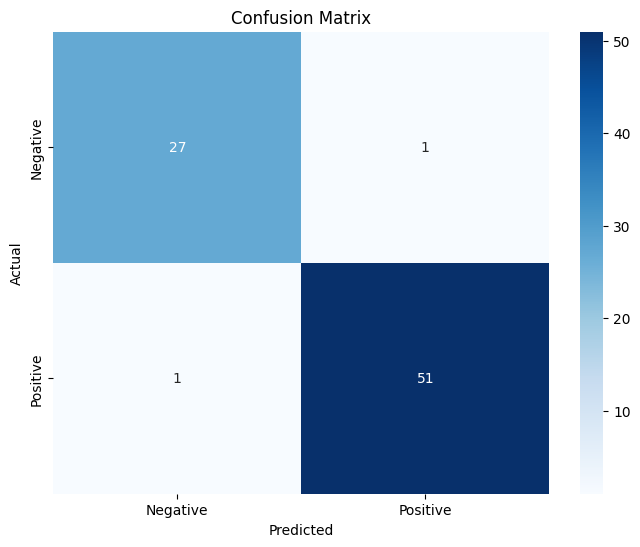

In [190]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


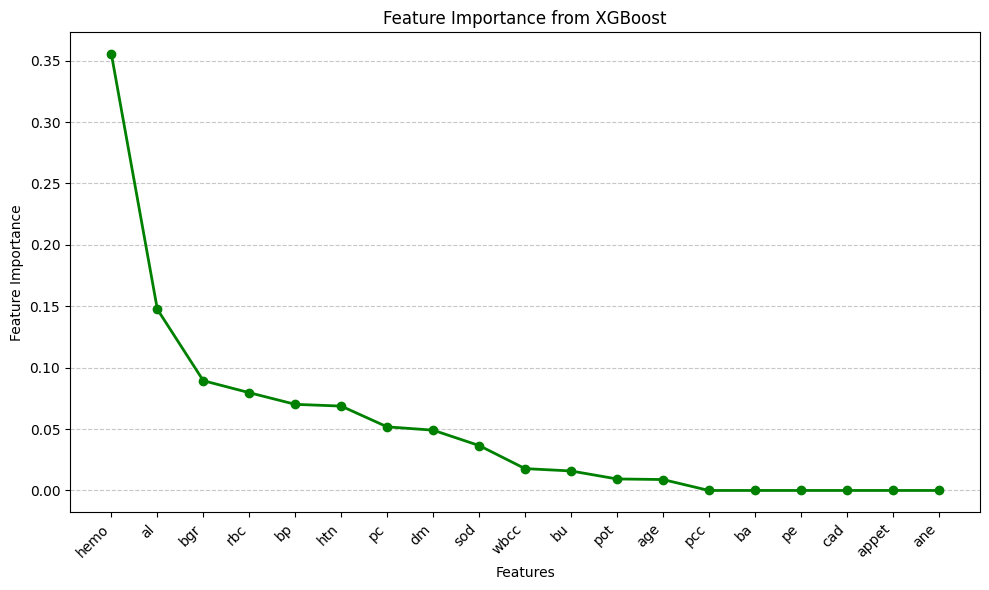

In [191]:
# Feature importance from the trained XGBoost model
feature_importances = modelxgb.feature_importances_
features = X_train.columns

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Create a line plot for feature importance
plt.figure(figsize=(10, 6))
plt.plot(feature_importances[sorted_indices], marker='o', linestyle='-', color='green', linewidth=2)

# Add feature names and labels
plt.xticks(ticks=range(len(sorted_indices)), labels=features[sorted_indices], rotation=45, ha='right')
plt.ylabel('Feature Importance')
plt.xlabel('Features')
plt.title('Feature Importance from XGBoost')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

[0.9875, 0.9625, 0.975]


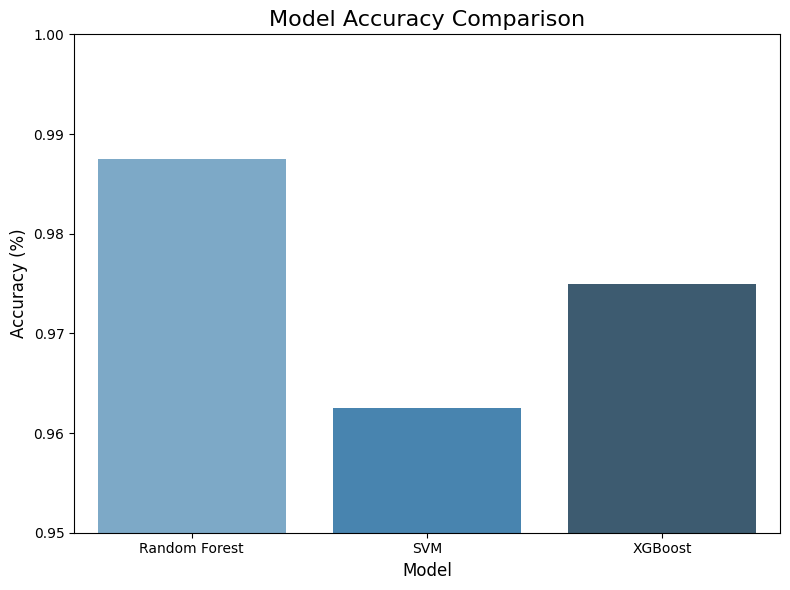

In [192]:
models = ['Random Forest', 'SVM', 'XGBoost']
accuracies = [rndm_ckd_acc, sv_acc, xgb_acc]
print(accuracies)
# Create the barplot
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='Blues_d')

# Set y-axis limit
plt.ylim(0.95, 1)

# Add titles and labels
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)

# Display the plot
plt.tight_layout()

# Save the plot as an image
plt.savefig('model_accuracy_comparison.png')
plt.show()
